### Kaggle : Facebook Recruiting IV: Human or Robot?
**Goal: ** Predict if an online bid is made by a machine or a human

**Approach: ** 
* Exploring the data and understanding the different available attributes
* Resampling data as a response to class imbalance
* Feature Engineering
* Use of Random Forest for prediction
* AUC as an evaluation metric

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = "C:\\Users\\OUMOUSS\\PycharmProjects\\Adomik\\"

In [3]:
bids = pd.read_csv(path+'bids.csv')
bids.sort_values('time', axis=0, ascending=True, inplace=True)

**Features:** distinct counts of different features in the bids dataset

In [4]:
grouping_counts = bids.groupby('bidder_id').agg({
        'bid_id':'nunique',
        'auction':'nunique',
        'device':'nunique',
        'country':'nunique',    
        'ip':'nunique',
        'url':'nunique'}).reset_index()

In [5]:
grouping_counts

,bidder_id,device,auction,country,ip,bid_id,url
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,2,1,1,1,2,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,3,2
4,00486a11dff552c4bd7696265724ff81yeo9v,8,13,1,10,20,7
5,0051aef3fdeacdadba664b9b3b07e04e4coc6,6,5,4,10,68,3
6,0053b78cde37c4384a20d2da9aa4272aym4pb,518,408,73,1951,10939,1937
7,0061edfc5b07ff3d70d693883a38d370oy4fs,45,38,4,53,134,34
8,00862324eb508ca5202b6d4e5f1a80fc3t3lp,1,1,1,1,5,1
9,009479273c288b1dd096dc3087653499lrx3c,1,1,1,1,1,1


**Feature:** based on time column

In [6]:
grouping_time = bids.groupby('bidder_id').agg({
        'time':['min', 'max']
    }).reset_index()
grouping_time.columns = ["_".join(x) for x in grouping_time.columns.ravel()]
grouping_time = grouping_time.rename(columns={'bidder_id_': 'bidder_id'})
grouping_time['time_diff'] = (grouping_time['time_max']-grouping_time['time_min'])//10**9
grouping_time

,bidder_id,time_min,time_max,time_diff
0,001068c415025a009fee375a12cff4fcnht8y,9706345052631578,9706345052631578,0
1,002d229ffb247009810828f648afc2ef593rb,9766744105263157,9766744210526315,0
2,0030a2dd87ad2733e0873062e4f83954mkj86,9704553947368421,9704553947368421,0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,9640018631578947,9705974315789473,65955
4,00486a11dff552c4bd7696265724ff81yeo9v,9632636526315789,9708986368421052,76349
5,0051aef3fdeacdadba664b9b3b07e04e4coc6,9759271368421052,9770226578947368,10955
6,0053b78cde37c4384a20d2da9aa4272aym4pb,9631938631578947,9709219052631578,77280
7,0061edfc5b07ff3d70d693883a38d370oy4fs,9759268736842105,9772865684210526,13596
8,00862324eb508ca5202b6d4e5f1a80fc3t3lp,9636539210526315,9636542263157894,3
9,009479273c288b1dd096dc3087653499lrx3c,9634283368421052,9634283368421052,0


**Feature:** common merchandise per bidder_id

In [7]:
# there is only one bidder_id with two different types of merchandise, however the next code returns the most common merchandise anyway.
merchandise_count = bids[['bidder_id','merchandise']].groupby(['bidder_id','merchandise']).merchandise.count().reset_index(name='count')
common_merchandise_grouping = merchandise_count[['bidder_id','merchandise']].loc[merchandise_count.groupby(['bidder_id'], sort=False)['count'].idxmax()]
common_merchandise_grouping = common_merchandise_grouping.rename(index=str, columns={"merchandise": "common_merchandise"})
common_merchandise_grouping

,bidder_id,common_merchandise
0,001068c415025a009fee375a12cff4fcnht8y,jewelry
1,002d229ffb247009810828f648afc2ef593rb,mobile
2,0030a2dd87ad2733e0873062e4f83954mkj86,mobile
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,mobile
4,00486a11dff552c4bd7696265724ff81yeo9v,home goods
5,0051aef3fdeacdadba664b9b3b07e04e4coc6,home goods
6,0053b78cde37c4384a20d2da9aa4272aym4pb,mobile
7,0061edfc5b07ff3d70d693883a38d370oy4fs,books and music
8,00862324eb508ca5202b6d4e5f1a80fc3t3lp,mobile
9,009479273c288b1dd096dc3087653499lrx3c,sporting goods


**Feature:** common country per bidder_id

In [8]:
country_count = bids[['bidder_id','country']].groupby(['bidder_id','country']).country.count().reset_index(name='count')
common_country_grouping = country_count[['bidder_id','country']].loc[country_count.groupby(['bidder_id'], sort=False)['count'].idxmax()]
common_country_grouping = common_country_grouping.rename(index=str, columns={"country": "common_country"})
common_country_grouping

,bidder_id,common_country
0,001068c415025a009fee375a12cff4fcnht8y,bn
1,002d229ffb247009810828f648afc2ef593rb,sg
2,0030a2dd87ad2733e0873062e4f83954mkj86,ir
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,id
4,00486a11dff552c4bd7696265724ff81yeo9v,ng
8,0051aef3fdeacdadba664b9b3b07e04e4coc6,us
50,0053b78cde37c4384a20d2da9aa4272aym4pb,ng
84,0061edfc5b07ff3d70d693883a38d370oy4fs,my
86,00862324eb508ca5202b6d4e5f1a80fc3t3lp,in
87,009479273c288b1dd096dc3087653499lrx3c,id


## Train/Test dataset

In [9]:
train = pd.read_csv(path+'train.csv')
nrow_train = train.shape[0]
test = pd.read_csv(path+'test.csv')
bidder_id = test['bidder_id']

In [10]:
y = train["outcome"]
train.drop('outcome', axis=1, inplace=True)
print(y.value_counts())

# concat train and test to apply the transformations in one go
df = pd.concat([train, test], 0)
del train,test
df.drop('payment_account', axis=1, inplace=True)
df.drop('address', axis=1, inplace=True)

0.0    1910
1.0     103
Name: outcome, dtype: int64


Imbalanced classes !

In [11]:
df = pd.merge(df,grouping_counts,on='bidder_id',how='left')
df = pd.merge(df,grouping_time[['bidder_id','time_diff']],on='bidder_id',how='left')
df = df.fillna(0)

In [12]:
df.isnull().sum()

bidder_id    0
device       0
auction      0
country      0
ip           0
bid_id       0
url          0
time_diff    0
dtype: int64

In [13]:
df = pd.merge(df,common_merchandise_grouping,on='bidder_id',how='left')
df = pd.merge(df,common_country_grouping,on='bidder_id',how='left')

In [14]:
df = df.fillna('unknown')

In [15]:
df.isnull().sum()

bidder_id             0
device                0
auction               0
country               0
ip                    0
bid_id                0
url                   0
time_diff             0
common_merchandise    0
common_country        0
dtype: int64

In [16]:
df.drop('bidder_id', axis=1, inplace = True)
X = df
del df

In [17]:
from sklearn.preprocessing import LabelEncoder
# Encoding common_merchandise & common_country

le = LabelEncoder()
X["common_merchandise"] = le.fit_transform(X["common_merchandise"])
X["common_country"] = le.fit_transform(X["common_country"])

In [18]:
X.head(5)

,device,auction,country,ip,bid_id,url,time_diff,common_merchandise,common_country
0,14.0,18.0,6.0,20.0,24.0,1.0,13135.0,5,49
1,2.0,1.0,1.0,3.0,3.0,2.0,6467.0,8,40
2,2.0,4.0,1.0,4.0,4.0,2.0,7137.0,9,40
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,62
4,53.0,23.0,2.0,123.0,155.0,91.0,11977.0,8,43


### Preparing data

In [19]:
train = X[:nrow_train]
test = X[nrow_train:]

In [20]:
train = pd.concat([train, y], 1)

In [21]:
train.head(5)

,device,auction,country,ip,bid_id,url,time_diff,common_merchandise,common_country,outcome
0,14.0,18.0,6.0,20.0,24.0,1.0,13135.0,5,49,0.0
1,2.0,1.0,1.0,3.0,3.0,2.0,6467.0,8,40,0.0
2,2.0,4.0,1.0,4.0,4.0,2.0,7137.0,9,40,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,62,0.0
4,53.0,23.0,2.0,123.0,155.0,91.0,11977.0,8,43,0.0


In [22]:
train.corr()

,device,auction,country,ip,bid_id,url,time_diff,common_merchandise,common_country,outcome
device,1.000000,0.904516,0.839037,0.663676,0.629542,0.687510,0.245694,0.020747,0.009199,0.107224
auction,0.904516,1.000000,0.822029,0.584298,0.503099,0.572790,0.274797,-0.001501,0.017565,0.132223
country,0.839037,0.822029,1.000000,0.468465,0.349526,0.395076,0.282813,0.014448,-0.027603,0.131583
ip,0.663676,0.584298,0.468465,1.000000,0.887212,0.776338,0.109082,0.020973,0.048843,0.084116
bid_id,0.629542,0.503099,0.349526,0.887212,1.000000,0.908402,0.085911,0.026293,0.038182,0.039439
url,0.687510,0.572790,0.395076,0.776338,0.908402,1.000000,0.100929,0.020063,0.041867,0.017785
time_diff,0.245694,0.274797,0.282813,0.109082,0.085911,0.100929,1.000000,-0.031678,0.010005,-0.019012
common_merchandise,0.020747,-0.001501,0.014448,0.020973,0.026293,0.020063,-0.031678,1.000000,0.060295,0.001188
common_country,0.009199,0.017565,-0.027603,0.048843,0.038182,0.041867,0.010005,0.060295,1.000000,0.045254
outcome,0.107224,0.132223,0.131583,0.084116,0.039439,0.017785,-0.019012,0.001188,0.045254,1.000000


In [23]:
train[['device', 'bid_id', 'ip', 'country', 'url', 'auction','outcome']].groupby('outcome').mean()

,device,bid_id,ip,country,url,auction
outcome,,,,,,
0.0,72.824607,1392.046073,572.430890,12.396335,330.097906,57.189005
1.0,163.611650,4004.038835,2387.796117,26.320388,544.582524,145.038835


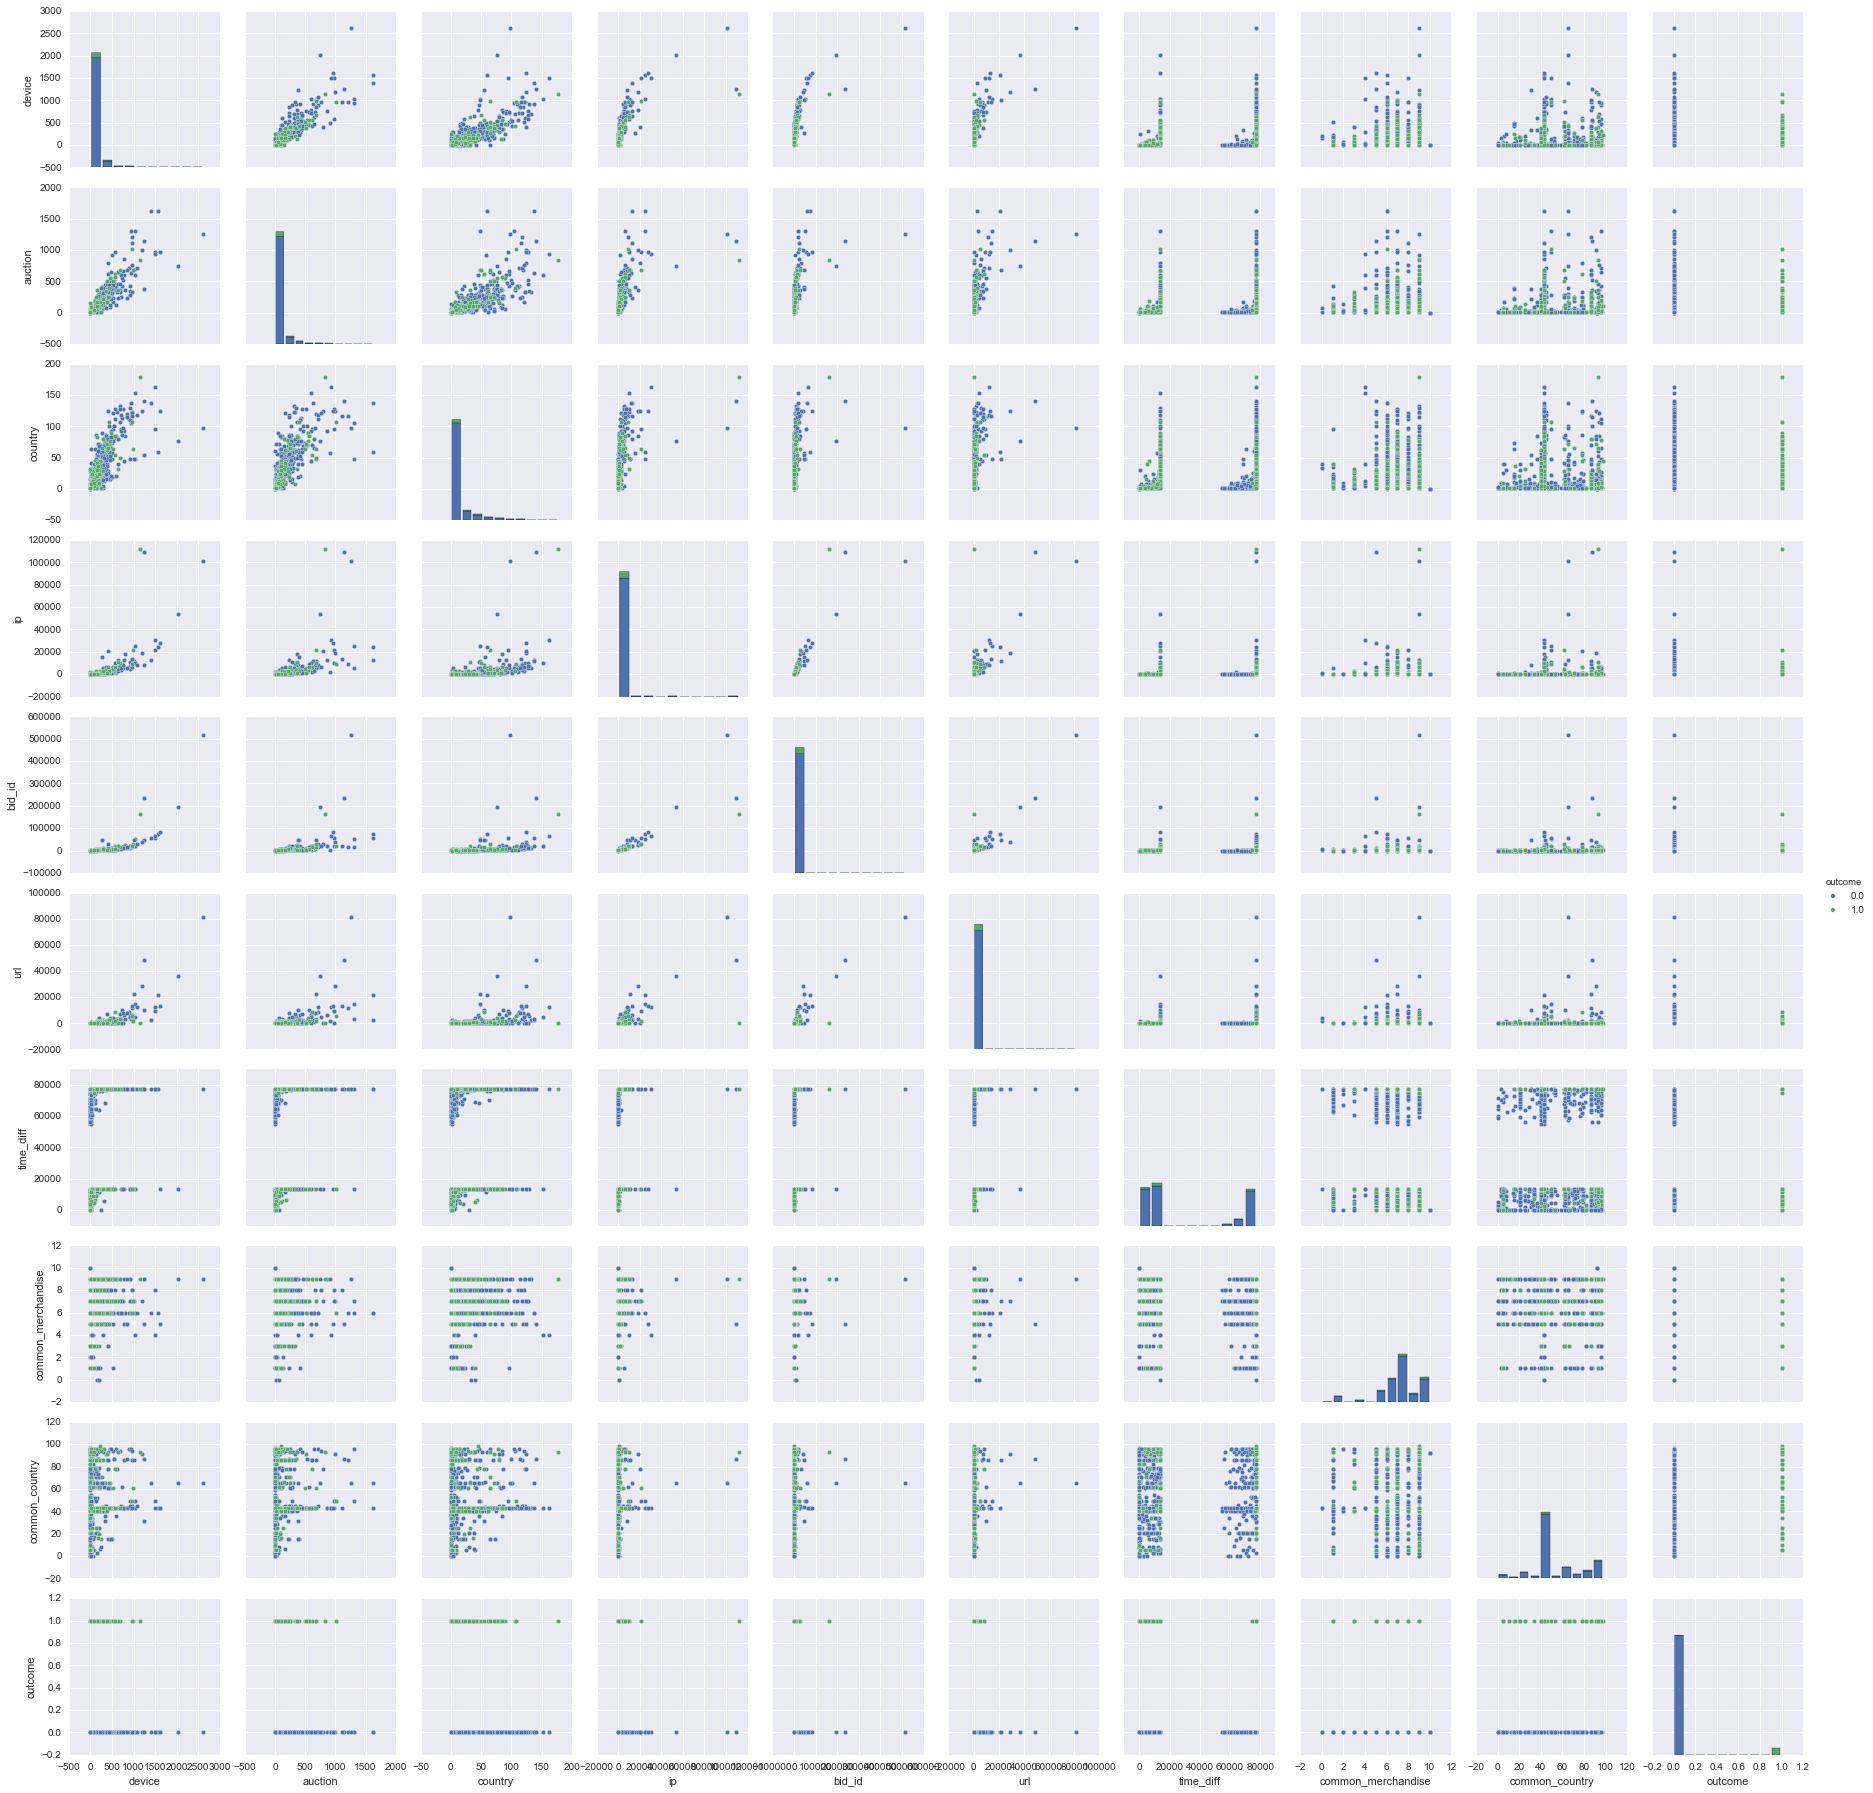

In [24]:
sns.pairplot(train, hue= "outcome")

### Up-sample Minority Class

In [25]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train[train.outcome==0]
df_minority = train[train.outcome==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1910,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.outcome.value_counts()

1.0    1910
0.0    1910
Name: outcome, dtype: int64

In [26]:
# X_train, y_train = df_upsampled[df_upsampled.columns.difference(['outcome'])], df_upsampled.outcome
train = df_upsampled
print(train.shape)
train.head(5)

(3820, 10)


,device,auction,country,ip,bid_id,url,time_diff,common_merchandise,common_country,outcome
0,14.0,18.0,6.0,20.0,24.0,1.0,13135.0,5,49,0.0
1,2.0,1.0,1.0,3.0,3.0,2.0,6467.0,8,40,0.0
2,2.0,4.0,1.0,4.0,4.0,2.0,7137.0,9,40,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,62,0.0
4,53.0,23.0,2.0,123.0,155.0,91.0,11977.0,8,43,0.0


### Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {'n_estimators': 20, 
             'max_depth': None, 
             'min_samples_split': 2,
             'random_state':0}

model = RandomForestClassifier(**rf_params)

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score

cols = ['country', 'ip', 'bid_id', 'device', 'url', 'auction','time_diff', 'common_merchandise','common_country']

X_train, X_test,y_train, y_test = train_test_split(train[cols],
                                                   train.outcome, 
                                                   test_size=0.3, 
                                                   # stratify=train.outcome,
                                                   random_state=0)

1. feature 2 (0.318499)
2. feature 1 (0.156577)
3. feature 8 (0.105391)
4. feature 6 (0.090179)
5. feature 3 (0.087493)
6. feature 4 (0.087043)
7. feature 5 (0.078155)
8. feature 0 (0.044091)
9. feature 7 (0.032572)


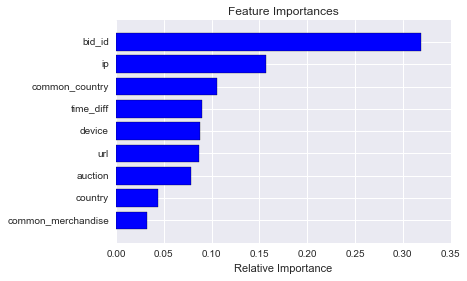

In [29]:
model.fit(X_train, y_train)

features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), 
         importances[indices], 
         color='b', 
         align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### Evaluation

In [30]:
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, auc

model.fit(X_train, y_train)
y_score = model.predict(X_test)
print("roc_auc_score: %.3f" %roc_auc_score(y_test, y_score))
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
print(fpr, tpr, thresholds)

roc_auc_score: 0.984
[ 0.          0.03270224  1.        ] [ 0.  1.  1.] [ 2.  1.  0.]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_score))

             precision    recall  f1-score   support

        0.0       1.00      0.97      0.98       581
        1.0       0.97      1.00      0.98       565

avg / total       0.98      0.98      0.98      1146



In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_score, labels=[0,1])
print(cm)
print("we have ",cm[0][0]+cm[1][1]," correct predictions and ",cm[1][0]+cm[0][1]," incorrect predictions.")

[[562  19]
 [  0 565]]
we have  1127  correct predictions and  19  incorrect predictions.


In [33]:
def plot_roc(fpr,tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, 
             tpr, 
             color='darkorange',
             label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

In [34]:
y_score_proba = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_score_proba)
print("roc_auc_score: %.3f" %roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_score_proba)

roc_auc_score: 0.997


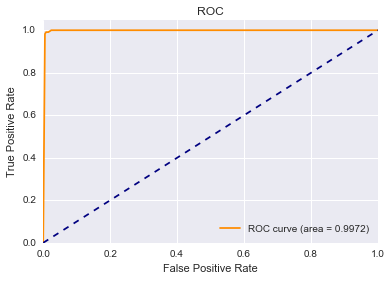

In [35]:
plot_roc(fpr,tpr, roc_auc)

## Submission

In [36]:
test.shape 

(4700, 9)

In [37]:
# proba_predictioncs = model.predict_proba(test)[:,1]
prediction = model.predict(test)
prediction.shape

(4700,)

In [38]:
def submit(bidder_id,prediction, filename):
    submission = pd.DataFrame(np.column_stack([bidder_id,prediction]),columns=["bidder_id","prediction"])
    submission["bidder_id"] = submission["bidder_id"]
    submission["prediction"] = submission["prediction"]
    submission.to_csv(filename,index=False)

submit(bidder_id, prediction, 'submission.csv')
print("Done!")